# Clickbait Project – Raw Data Overview


This notebook provides an overview of all raw datasets under `data/raw/` used in the clickbait detection project.
We will inspect schema, peek at examples, and outline how each dataset contributes to the overall task.

## Objectives


In this notebook we:

- Summarize the purpose and structure of each dataset in `data/raw`.
- Inspect the first few rows of every dataset to understand schema and content.
- Compute simple descriptive statistics:
  - Number of rows/columns per dataset.
  - Label distributions (clickbait vs non-clickbait or topics) where available.
  - Text length statistics for key text fields.
- Visualize:
  - Dataset sizes.
  - Label distributions.
  - Text length distributions.

The heavy lifting (loading and simple metrics) is implemented in `src/eda`.
This notebook focuses on presentation: tables, diagrams, and narrative.


## 0. Import Libraries and Module

In [11]:
import sys
from pathlib import Path

sys.path.insert(0, str(Path.cwd().resolve().parent))

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from src.eda import (
    load_all_raw_datasets,
    build_raw_overview_table,
    compute_label_stats,
    summarize_text_lengths,
    compute_text_lengths,
)

sns.set(style="whitegrid")
pd.set_option("display.max_colwidth", 200)

## 1. Global Overview of Raw Datasets

The table below shows, for each dataset:

- `name`: The internal identifier used in `src/eda`.
- `n_rows` / `n_columns`: Dataset size.
- `example_text_cols`: Columns that likely contain text (title, headline, text, etc.).
- `example_label_cols`: Columns that likely represent labels (`label`, `clickbait`, `topic`).

Next, we visualize dataset sizes and then dive into each family of datasets.


In [13]:
# Load every known raw dataset
datasets = load_all_raw_datasets()

overview_df = build_raw_overview_table(datasets)
print("Overview of loaded raw datasets:")
display(overview_df.sort_values("name").reset_index(drop=True))

Overview of loaded raw datasets:


,name,n_rows,n_columns,example_text_cols,example_label_cols
0,cbd_sample_submission,5647,2,[],[label]
1,cbd_test,5647,3,"[title, text]",[]
2,cbd_train,24871,4,"[title, text]",[label]
3,cbd_unlabeled,80013,3,"[title, text]",[]
4,cbd_valid,3552,4,"[title, text]",[label]
5,custom_greek_news,205,6,"[title, description]",[topic]
6,github_clickbait,31986,2,[title],[label]
7,kaggle_clickbait_data,32000,2,[headline],[clickbait]
8,kaggle_train2,21029,2,[title],[label]
9,lifo_mostpopular_7days_today,126,3,[title],[clickbait]


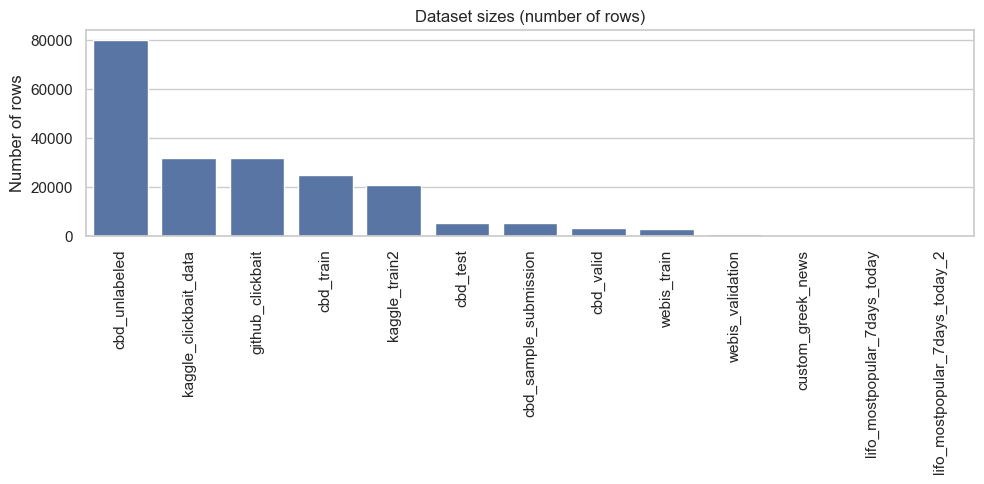

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=overview_df.sort_values("n_rows", ascending=False),
    x="name",
    y="n_rows",
)
plt.xlabel(None)
plt.xticks(rotation=90)
plt.ylabel("Number of rows")
plt.title("Dataset sizes (number of rows)")
plt.tight_layout()
plt.show()


## 2. Custom Greek Data (`data/raw/custom`)

This family combines manually collected Greek-language data:

- **`custom_greek_news`** (`greek_news.xlsx`):
  - Collected by `data_collection/search_agent.py`.
  - English summaries of Greek news articles with topic labels (e.g. Politics, Economy, Sports).
- **`lifo_mostpopular_7days_today*`**:
  - Headlines scraped from LIFO's "Most Popular" sections.
  - All labeled as clickbait-positive (`clickbait = 1`), mainly in Greek.

We first inspect the Greek news workbook, then the LIFO clickbait headlines.

In [16]:
greek_news = datasets.get("custom_greek_news")
greek_news.head()

,timestamp_utc,query,url,title,description,topic
0,2025-11-19T23:06:57.411843,Latest news about the Greek economy,https://www.naftemporiki.gr/english/2034814/eu-commission-maintaining-high-growth-rates-and-surpluses-in-2025-and-2026/,EU Commission: Maintaining high growth rates and surpluses in 2025 and 2026,"The European Commission’s latest outlook sees Greece growing by 2.1% in 2025, 2.2% in 2026 and 1.7% in 2027, outpacing the eurozone. It projects steady primary surpluses, gradually easing inflatio...",Economy
1,2025-11-19T23:06:57.411843,Latest news about the Greek economy,https://www.naftemporiki.gr/english/2034680/greek-debt-returns-to-pre-memorandum-levels-100-points-lower-than-negative-record/,Greek debt returns to pre-memorandum levels – 100 points lower than negative record,"Greece’s borrowing costs have fallen back to pre-memorandum levels, aided by improved market credibility and primary surpluses. The Finance Ministry targets pushing the debt-to-GDP ratio below 120...",Economy
2,2025-11-19T23:06:57.411843,Latest news about the Greek economy,https://www.naftemporiki.gr/english/2035181/new-measures-to-address-the-housing-problem/,New measures to address the housing problem,"Athens is preparing tweaks to the “My Home 2” program to fully absorb its €2 billion budget, aiming to support around 20,000 beneficiaries. Officials are considering higher income thresholds to ex...",Economy
3,2025-11-19T23:06:57.411843,Latest news about the Greek economy,https://en.protothema.gr/2025/11/15/greek-economy-upgraded-to-a-higher-investment-grade-fitch-lifts-rating-to-bbb/,Greek economy upgraded to a higher investment grade,"Fitch upgraded Greece’s credit rating to BBB, citing steady ~2% growth driven by domestic demand, investment and jobs, and a continued convergence toward eurozone income levels. The move pushes Gr...",Economy
4,2025-11-19T23:06:57.411843,Latest news about the Greek economy,https://en.protothema.gr/2025/11/18/bank-of-greece-cash-surplus-of-3-92-billion-euros-in-10-months-to-2025/,Bank of Greece: Cash surplus of €3.92 billion in 10 months to 2025,"The central government’s cash balance showed a €3.92 billion surplus in January–October 2025, versus €7.04 billion a year earlier. Regular budget revenues rose to €60.36 billion while expenditures...",Economy


Topic distribution in custom_greek_news:


,count,ratio
topic,,
Economy,41,0.200000
Politics,37,0.180488
Technology,34,0.165854
Sports,30,0.146341
Society,22,0.107317
Culture,21,0.102439
Fashion,20,0.097561



Title length stats (characters): {'min': 29.0, 'max': 157.0, 'mean': 75.74634146341464, 'median': 75.0}
Description length stats (characters): {'min': 168.0, 'max': 389.0, 'mean': 260.8048780487805, 'median': 257.0}


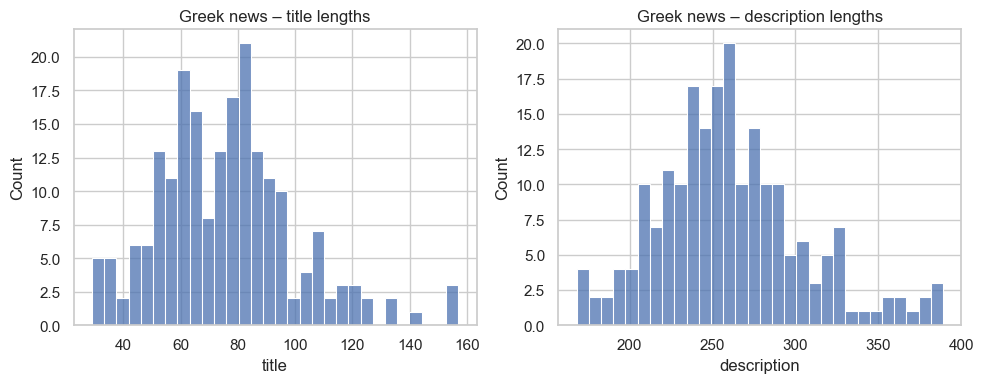

In [17]:
print("Topic distribution in custom_greek_news:")
topic_stats = greek_news["topic"].value_counts(normalize=False).to_frame("count")
topic_stats["ratio"] = topic_stats["count"] / len(greek_news)
display(topic_stats)

title_stats = summarize_text_lengths(greek_news, "title")
desc_stats = summarize_text_lengths(greek_news, "description")

print("\nTitle length stats (characters):", title_stats)
print("Description length stats (characters):", desc_stats)

# Histograms for title and description lengths
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(compute_text_lengths(greek_news, "title"), bins=30)
plt.title("Greek news – title lengths")

plt.subplot(1, 2, 2)
sns.histplot(compute_text_lengths(greek_news, "description"), bins=30)
plt.title("Greek news – description lengths")

plt.tight_layout()
plt.show()


In [18]:
lifo_names = [
    "lifo_mostpopular_7days_today",
    "lifo_mostpopular_7days_today_2",
]

for name in lifo_names:
    df = datasets.get(name)
    if df is None:
        continue

    print(f"\n=== {name} ===")
    print(f"Shape: {df.shape}")
    display(df.head())

    if "clickbait" in df.columns:
        print("\nClickbait value counts:")
        display(df["clickbait"].value_counts(dropna=False))



=== lifo_mostpopular_7days_today ===
Shape: (126, 3)


,section,title,clickbait
0,ΕΙΔΗΣΕΙΣ,Ελλάδα Καιρός - Μαρουσάκης: Εν αναμονή νέου βαρομετρικού χαμηλού και βαρυχειμωνιάς την επόμενη εβδομάδα 12.11.2025,1
1,ΕΙΔΗΣΕΙΣ,Διεθνή Το ελληνικό νησί που ψήφισαν οι Βρετανοί ως τον καλύτερο προορισμό για περπάτημα 10.11.2025,1
2,ΕΙΔΗΣΕΙΣ,"Πολιτισμός Ντεγκά, Ματίς, Μονέ και άλλοι 43 σπουδαίοι καλλιτέχνες σε μια έκθεση στην Αθήνα 14.11.2025",1
3,ΕΙΔΗΣΕΙΣ,Διεθνή Πρίγκιπας Ουίλιαμ: Νέο βίντεό του πυροδότησε φήμες για το εσωτερικό του Forest Lodge 14.11.2025,1
4,ΕΙΔΗΣΕΙΣ,TV & Media Ηλιάνα Παπαγεωργίου: Κατέθεσε αγωγή ύψους 1.000.000 ευρώ κατά της Έλενας Χριστοπούλου 14.11.2025,1



Clickbait value counts:


clickbait
1    126
Name: count, dtype: int64


=== lifo_mostpopular_7days_today_2 ===
Shape: (105, 3)


,section,title,clickbait
0,ΕΙΔΗΣΕΙΣ,Τech & Science Όσοι έχουν γάτα διατρέχουν αυξημένο κίνδυνο να εμφανίσουν σχιζοφρένεια 19.11.2025,1
1,ΕΙΔΗΣΕΙΣ,TV & Media Γλυκερία για την εμφάνιση στο Ισραήλ: «Δε με στηρίξανε από τον χώρο μου» 18.11.2025,1
2,ΕΙΔΗΣΕΙΣ,Πολιτισμός Οι Deep Purple ανακοίνωσαν συναυλία στην Ελλάδα 18.11.2025,1
3,ΕΙΔΗΣΕΙΣ,Ελλάδα Καιρός - Μαρουσάκης: Χιόνια και ραγδαία πτώση της θερμοκρασίας το Σαββατοκύριακο 19.11.2025,1
4,ΕΙΔΗΣΕΙΣ,Ελλάδα Καιρός - Τσατραφύλλιας: «Εμμονικές και επικίνδυνες καταιγίδες τις επόμενες ώρες» 19.11.2025,1



Clickbait value counts:


clickbait
1    105
Name: count, dtype: int64


Text length stats for lifo_mostpopular_7days_today (title):
{'min': 44.0, 'max': 137.0, 'mean': 90.34126984126983, 'median': 90.0}


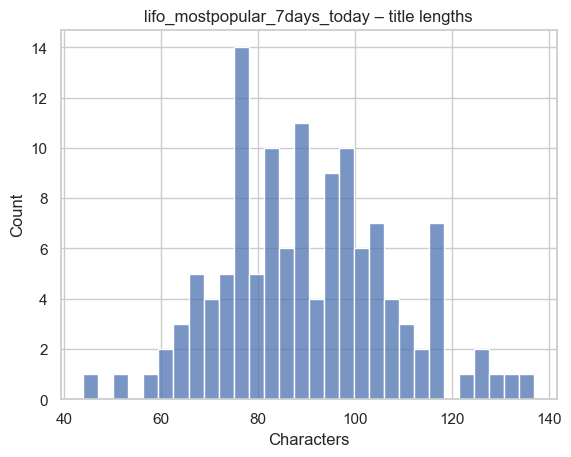


Text length stats for lifo_mostpopular_7days_today_2 (title):
{'min': 3.0, 'max': 138.0, 'mean': 91.67619047619047, 'median': 91.0}


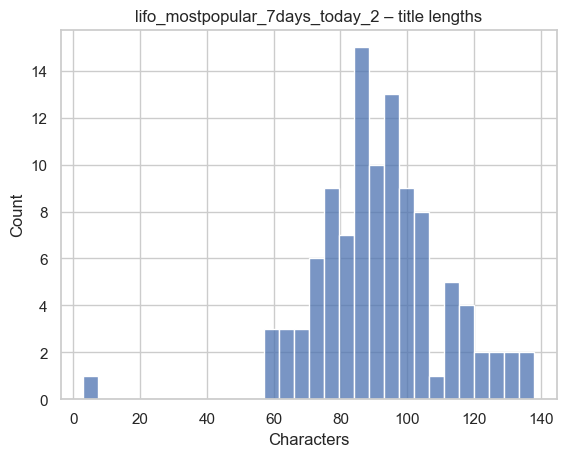

In [19]:
for name in lifo_names:
    df = datasets.get(name)
    if df is None:
        continue

    print(f"\nText length stats for {name} (title):")
    stats = summarize_text_lengths(df, "title")
    print(stats)

    sns.histplot(compute_text_lengths(df, "title"), bins=30)
    plt.title(f"{name} – title lengths")
    plt.xlabel("Characters")
    plt.show()


## 3. GitHub Snapshot (`github_clickbait`)


A small CSV from a public GitHub/Gist source:

- Columns: `title`, `label` (0 = non-clickbait, 1 = clickbait).
- Useful as a lightweight, easy-to-inspect dataset for sanity checks and pipeline debugging.

In [20]:
github_df = datasets.get("github_clickbait")
github_df.head()

,title,label
0,"15 Highly Important Questions About Adulthood, Answered By Michael Ian Black",1
1,250 Nuns Just Cycled All The Way From Kathmandu To New Delhi,1
2,"Australian comedians ""could have been shot"" during APEC prank",0
3,Lycos launches screensaver to increase spammers' bills,0
4,Fußball-Bundesliga 2008–09: Goalkeeper Butt signs with Bayern Munich,0


GitHub label distribution:


,count,ratio
label,,
0,16000,0.500219
1,15986,0.499781



Title length stats: {'min': 11.0, 'max': 135.0, 'mean': 53.82107797161258, 'median': 52.0}


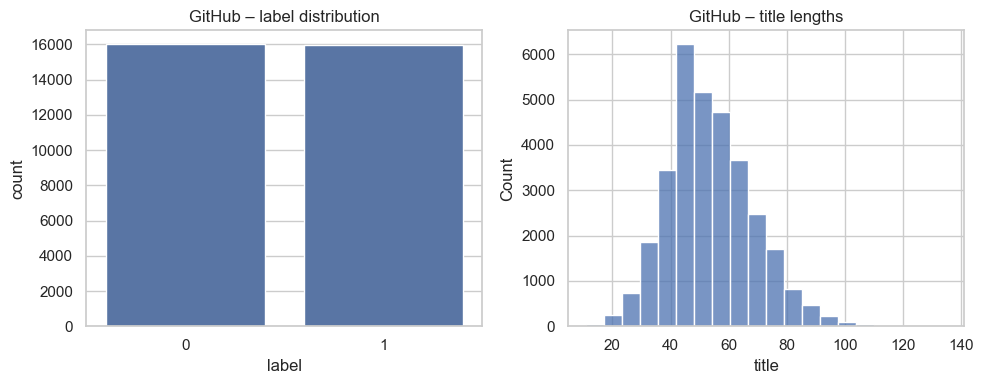

In [21]:
print("GitHub label distribution:")
display(compute_label_stats(github_df, "label"))

title_stats = summarize_text_lengths(github_df, "title")
print("\nTitle length stats:", title_stats)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x="label", data=github_df)
plt.title("GitHub – label distribution")

plt.subplot(1, 2, 2)
sns.histplot(compute_text_lengths(github_df, "title"), bins=20)
plt.title("GitHub – title lengths")

plt.tight_layout()
plt.show()


## 4. Kaggle Collections (`kaggle_*`)

Kaggle contributes several clickbait datasets:

- `kaggle_clickbait_data` (`clickbait_data.csv`):
  - Column `headline` with `clickbait` (0/1).
- `kaggle_train2` (`train2.csv`):
  - `title` with `label` in {`news`, `clickbait`}.
- `cbd_train`, `cbd_valid`, `cbd_test`, `cbd_unlabeled`:
  - Full Clickbait News Detection competition dataset.
  - `train`/`valid` have labels; `test` and `unlabeled` do not.

We inspect the main training-style splits and their label/text statistics.

kaggle_clickbait_data:


,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer Is Here To Give You Chills",1
3,"This Vine Of New York On ""Celebrity Big Brother"" Is Fucking Perfect",1
4,A Couple Did A Stunning Photo Shoot With Their Baby After Learning She Had An Inoperable Brain Tumor,1



Label stats (clickbait column):


,count,ratio
clickbait,,
0,16001,0.500031
1,15999,0.499969



Headline length stats:
{'min': 6.0, 'max': 135.0, 'mean': 53.7970625, 'median': 52.0}


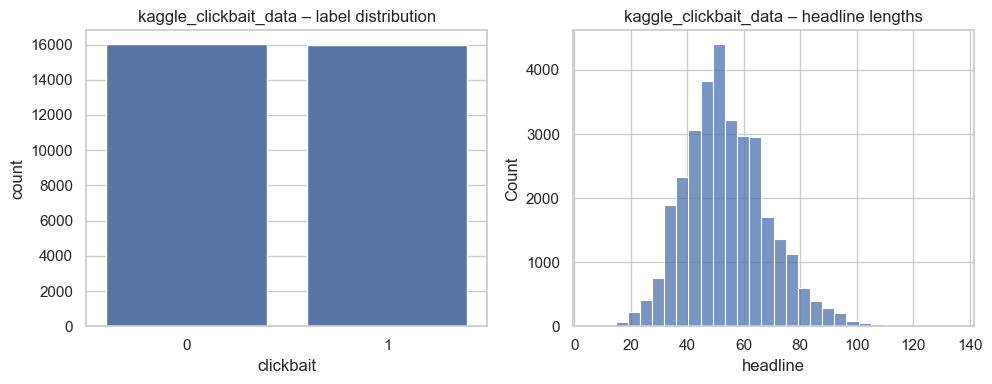

In [22]:
k_clickbait_data = datasets.get("kaggle_clickbait_data")
print("kaggle_clickbait_data:")
display(k_clickbait_data.head())

print("\nLabel stats (clickbait column):")
display(compute_label_stats(k_clickbait_data, "clickbait"))

print("\nHeadline length stats:")
print(summarize_text_lengths(k_clickbait_data, "headline"))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x="clickbait", data=k_clickbait_data)
plt.title("kaggle_clickbait_data – label distribution")

plt.subplot(1, 2, 2)
sns.histplot(compute_text_lengths(k_clickbait_data, "headline"), bins=30)
plt.title("kaggle_clickbait_data – headline lengths")
plt.tight_layout()
plt.show()


kaggle_train2:


,label,title
0,news,China and Economic Reform: Xi Jinping’s Track Record
1,news,Trade to Be a Big Topic in Theresa May’s U.S. Visit
2,clickbait,"The Top Beaches In The World, According To National Geographic"
3,clickbait,"Sheriff’s Report Provides New Details on Tamir Rice’s Death, but Leaves Questions"
4,news,Surgeon claiming he will transplant volunteer's HEAD to another body says he needs America's help to do it



Label stats (label column):


,count,ratio
label,,
news,16738,0.795948
clickbait,4291,0.204052



Title length stats:
{'min': 4.0, 'max': 4038.0, 'mean': 74.75966522421417, 'median': 66.0}


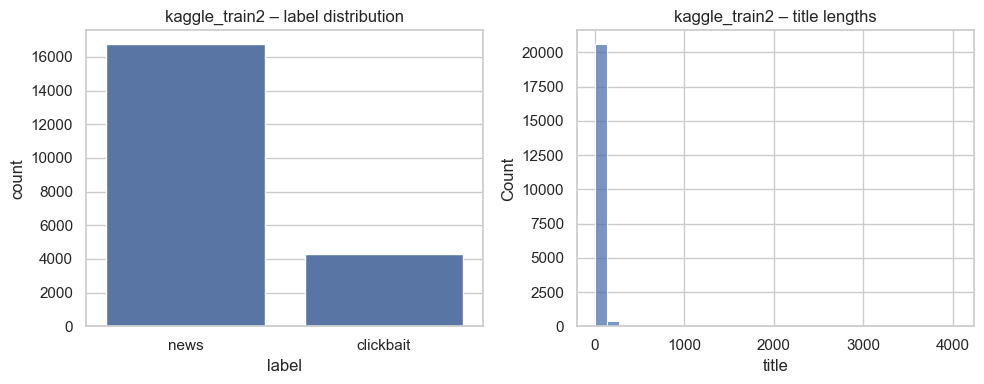

In [23]:
k_train2 = datasets.get("kaggle_train2")
print("kaggle_train2:")
display(k_train2.head())

print("\nLabel stats (label column):")
display(compute_label_stats(k_train2, "label"))

print("\nTitle length stats:")
print(summarize_text_lengths(k_train2, "title"))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x="label", data=k_train2)
plt.title("kaggle_train2 – label distribution")

plt.subplot(1, 2, 2)
sns.histplot(compute_text_lengths(k_train2, "title"), bins=30)
plt.title("kaggle_train2 – title lengths")
plt.tight_layout()
plt.show()

cbd_train:


,id,title,text,label
0,0,China and Economic Reform: Xi Jinping’s Track Record,Economists generally agree: China must overhaul its huge but wasteful economy if it wants to continue to grow in the years to come. That means limiting political interference in banking and the fi...,news
1,1,Trade to Be a Big Topic in Theresa May’s U.S. Visit,"LONDON—British Prime Minister Theresa May said she’ll discuss trade and security in a coming meeting with President Donald Trump, his first visit from a foreign leader as president, underscoring t...",news
2,2,"The Top Beaches In The World, According To National Geographic","Beaches come in all sorts of shapes and sizes beyond the typical Caribbean postcard. As such, National Geographic’s new list of the Top 21 Beaches in the World includes a diverse mix of shorelines...",clickbait
3,3,"Sheriff’s Report Provides New Details on Tamir Rice’s Death, but Leaves Questions","A timeline of what happened after Tamir Rice, a 12-year-old boy, was killed by a police officer in Cleveland last November. A lengthy report published Saturday revealed new details about the fatal...",clickbait
4,4,Surgeon claiming he will transplant volunteer's HEAD to another body says he needs America's help to do it,An Italian neurosurgeon who has claimed for months that he will perform the world's first human head transplant asked Americans to 'be Americans' and donate to his cause. Dr. Sergio Canavero's pl...,news



Train label stats:


,count,ratio
label,,
news,14650,0.589039
other,6473,0.260263
clickbait,3748,0.150698



Title length stats (train):
{'min': 1.0, 'max': 4038.0, 'mean': 58.78963451409272, 'median': 60.0}


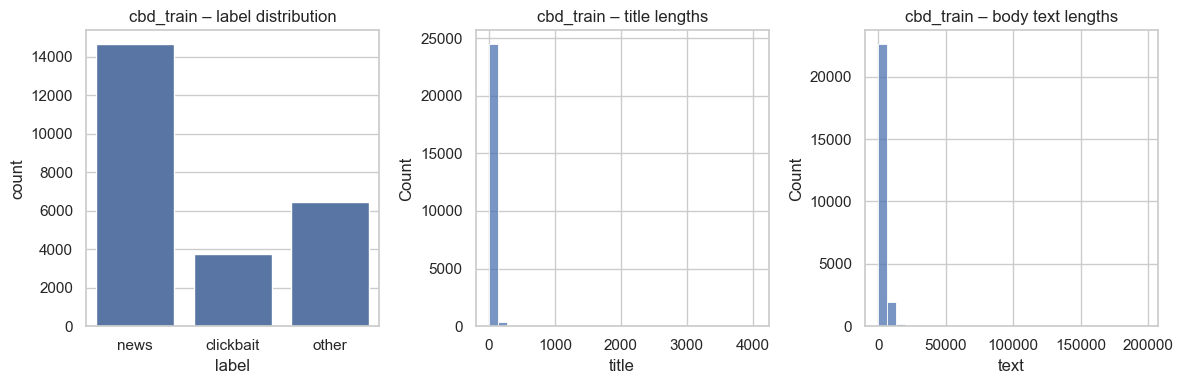


Validation split (cbd_valid) – head:


,id,title,text,label
0,0,Trump says he is releasing something 'phenomenal in terms of tax' in 2 to 3 weeks,"Bob Bryan, Business Insider 9.02.2017, 16:25 182 facebook linkedin twitter email print ""We're going to be announcing something over the next, I would say, two or three weeks that will be phenomena...",news
1,1,Fidel Castro's ashes make their final journey across Cuba,Cubans have been lining the streets from Havana to Santiago to watch Fidel Castro's ashes make their final journey. The route is the reverse of that taken by Castro and his rebels to mark their vi...,news
2,2,Obama Administration Sending $500 Million to Global Climate Change Fund,"WASHINGTON—The Obama administration announced Tuesday it is funneling $500 million to a global fund to address climate change, one of the final acts President Barack Obama is taking to preserve hi...",news
3,3,Insurers Are Worried About The House GOP Health Care Bill,The main industry groups representing health insurance companies have broken their silence on the Republican bill to repeal the Affordable Care Act and “replace” it with smaller reforms. America’s...,news
4,4,Kobe Bryant and Nike Form Youth Basketball 'Mamba League' in Los Angeles,"A year after Kobe Bryant concluded his NBA career, Bryant and Nike have announced a partnership to establish a youth basketball program in Los Angeles. The Mamba League will instruct boys and gir...",news


In [24]:
cbd_train = datasets.get("cbd_train")
cbd_valid = datasets.get("cbd_valid")

print("cbd_train:")
display(cbd_train.head())

print("\nTrain label stats:")
display(compute_label_stats(cbd_train, "label"))

print("\nTitle length stats (train):")
print(summarize_text_lengths(cbd_train, "title"))

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(x="label", data=cbd_train)
plt.title("cbd_train – label distribution")

plt.subplot(1, 3, 2)
sns.histplot(compute_text_lengths(cbd_train, "title"), bins=30)
plt.title("cbd_train – title lengths")

plt.subplot(1, 3, 3)
sns.histplot(compute_text_lengths(cbd_train, "text"), bins=30)
plt.title("cbd_train – body text lengths")

plt.tight_layout()
plt.show()

print("\nValidation split (cbd_valid) – head:")
display(cbd_valid.head())


In [25]:
cbd_test = datasets.get("cbd_test")
cbd_unlabeled = datasets.get("cbd_unlabeled")

print("cbd_test:")
display(cbd_test.head())

print("\nText length stats (cbd_test title):")
print(summarize_text_lengths(cbd_test, "title"))

print("\ncbd_unlabeled:")
display(cbd_unlabeled.head())

print("\nText length stats (cbd_unlabeled title):")
print(summarize_text_lengths(cbd_unlabeled, "title"))


cbd_test:


,id,title,text
0,0,Amazon CEO Jeff Bezos is now the second richest man in the world,"More Try Yahoo Finance on Firefox » Amazon CEO Jeff Bezos is now the second richest man in the world after overtaking Amancio Ortega and Warren Buffett, according to Bloomberg's Billionaires Index..."
1,1,Does Laura Dern Handle a Lightsaber in the New ‘Star Wars’? [Video],"More Laura Dern seems to be everywhere these days. That’s because she is. She’s the ferocious Renata in Big Little Lies, she’s a recovering drug addict in Wilson, and she has two top-secret roles ..."
2,2,"In this photographer’s home town, stepping out of the house is a risk","Kirkuk is a city of Northern Iraq in the Kurdish region of the country. Arabs, Kurds, Turkmen, Christians and foreign workers live beside one another. Back in the day, Saddam Hussein initiated sev..."
3,3,"8 Ways To Get Your Spouse To Open Up More, According To Therapists","Experts say that communication is the cornerstone of a good relationship. That’s why it can be deeply troubling when your partner is closed off and guarded. How do you get them to open up? Below,..."
4,4,US says claim it supported IS in Syria is 'ludicrous',"Share this with Email Facebook Messenger Messenger Twitter Pinterest WhatsApp LinkedIn Copy this link The US has described as ""ludicrous"" a claim by Turkish President Recep Tayyip Erdogan that it ..."



Text length stats (cbd_test title):
{'min': 4.0, 'max': 2091.0, 'mean': 71.50486984239419, 'median': 65.0}

cbd_unlabeled:


,Unnamed: 0,title,text
0,0,"Freida Pinto, Allison Williams, Kuoth Wiel are a dream in David O. Russell's Prada film","Is David O. Russell's Prada short film the future of fashion advertising? Can the artistry of film sell clothing better and entertain? Let's hope so. Past Forward, an 18-minute short film out toda..."
1,1,India's Cash Crisis Isn't Modi's Only Headache - Bloomberg,"Connecting decision makers to a dynamic network of information, people and ideas, Bloomberg quickly and accurately delivers business and financial information, news and insight around the world. A..."
2,2,"12 years after her murder, DNA from teen victim's fingernails leads to suspect","NEW YORK – Ten years after her murder, the DNA beneath a teenager’s fingernails has finally resulted in an indictment, reportsCBS New York. On Feb. 11, 2004, the naked body of 17-year-old Sharabia..."
3,3,"Thanks Kejriwal, Delhi Is Number 1 Now, On The List Of World's Most Polluted Cities!","Hey, Arvind Kejriwal, you did it - New Delhi is number 1. The number 1 most polluted city in the world. Air Quality Index measurements from the US Embassy clocked Delhi at 999 on Monday - which ..."
4,4,"""You heard it here first"": Man predicted Cubs World Series win in 1993 yearbook","It’s a quote that has stuck with Los Angeles Dodgers fan Marcos Meza for decades: “Chicago Cubs. 2016. World Champions. You heard it here first.” His classmate Mike Lee, a die-hard Chicago Cubs fa..."



Text length stats (cbd_unlabeled title):
{'min': 3.0, 'max': 3698.0, 'mean': 68.79540824616, 'median': 67.0}


## 5. Webis Clickbait 22 (`zenodo/webis_*`)

The Webis Clickbait 22 corpus is a rich, JSONL-based dataset:

- `webis_train`, `webis_validation` (flattened in `src/eda`):
  - `post_text`: teaser text (first element of `postText` list).
  - `target_title`: title of the target article.
  - `target_description`: short description.
  - `tags`: annotation tags that characterize the clickbait style.

We explore a few examples and basic length statistics.

In [26]:
webis_train = datasets.get("webis_train")
webis_val = datasets.get("webis_validation")

print("webis_train (flattened) – head:")
display(webis_train.head())

print("\nwebis_validation (flattened) – head:")
display(webis_val.head())


webis_train (flattened) – head:


,uuid,post_platform,post_text,target_title,target_description,tags
0,0af11f6b-c889-4520-9372-66ba25cb7657,reddit,"Wes Welker Wanted Dinner With Tom Brady, But Patriots QB Had Better Idea","Wes Welker Wanted Dinner With Tom Brady, But Patriots QB Had A Better Idea",It'll be just like old times this weekend for Tom Brady and Wes Welker. Welker revealed Friday morning on a Miami radio station that he contacted Brady because he'll be in town for Sunday's game b...,[passage]
1,b1a1f63d-8853-4a11-89e8-6b2952a393ec,Twitter,NASA sets date for full recovery of ozone hole,Hole In Ozone Layer Expected To Make Full Recovery By 2070: NASA,2070 is shaping up to be a great year for Mother Earth.\r\n\r\nThat's when NASA scientists are predicting the,[phrase]
2,008b7b19-0445-4e16-8f9e-075b73f80ca4,Twitter,This is what makes employees happy -- and it's not their paycheck,"Intellectual Stimulation Trumps Money For Employee Happiness, Survey Finds","By: Chad Brooks \r\nPublished: 09/18/2013 06:40 AM EDT on BusinessNewsDaily\r\n\r\n Despite common belief, money isn't the key to employee happiness, new re...",[phrase]
3,31ecf93c-3e21-4c80-949b-aa549a046b93,Twitter,Passion is overrated — 7 work habits you need instead,"‘Follow your passion’ is wrong, here are 7 habits you need instead",There's a lot more to work that loving your job,[multi]
4,31b108a3-c828-421a-a4b9-cf651e9ac859,Twitter,The perfect way to cook rice so that it's perfectly fluffy and NEVER sticks to the pan,Revealed: The perfect way to cook rice so that it's perfectly fluffy and NEVER sticks to the bottom of the pan,The question 'How does one cook rice properly?' was posted on website Quora. The top voted answer is refreshingly simple - but it does require an investment of between £15 and £20.,[phrase]



webis_validation (flattened) – head:


,uuid,post_platform,post_text,target_title,target_description,tags
0,6dc7ddef-4e8e-4a6b-9296-526377518071,Facebook,Five Nights at Freddy’s Sequel Delayed for Weird Reason,Five Nights at Freddy’s Sequel Delayed for Weird Reason,"Five Nights at Freddy's creator Scott Cawthon takes to Steam to tease a possible delay for Five Nights at Freddy's: Sister Location, the fifth game in the series.",[passage]
1,435b24de-56f6-4d4e-9c38-54b8e0630aac,reddit,Why Arizona Sheriff Joe Arpaio’s fate could hang on a single word,Why Arizona Sheriff Joe Arpaio’s fate could hang on a single word,"<p>A single word — ""intentionally"" — could transform a court case against Phoenix-area Sheriff Joe Arpaio from civil charges to a criminal prosecution.</p>",[multi]
2,8091ba93-6376-473a-9117-01d6cf0507e4,Twitter,Here’s how much you should be tipping your hairdresser,Here’s how much you should be tipping your hairdresser,Remembering how much you’re supposed to tip anywhere can be hard — what do current trends dictate? Is there such a thing as too...,[phrase]
3,8b713277-0e5b-4873-a216-b650f21f3b4c,Twitter,"""Harry Potter"" alums reunite for new movie","Alan Rickman & Rupert Grint On 'CBGB,' Reuniting Post-'Potter' And Favorite Halloween Costumes","The mythology of punk music's evolution can be traced back, more or less, to one singular staple: CBGB. Opened in 1973 in downtown Manhattan's East Villa...",[multi]
4,a2f91b65-c36c-481f-92b1-2fc77d6411fc,Twitter,A man swallowed a microSD card and you won't believe what happened next!,Man swallowed a microSD card and you won't believe what happened next!,"PetaPixel is one of my favorite blogs. The writers there are passionate and knowledgable about their subject, and love diving into both the art of photography, and the technical gear available for...",[passage]


webis_train – post_text length stats:
{'min': 8.0, 'max': 158.0, 'mean': 61.935, 'median': 61.0}

webis_train – target_title length stats:
{'min': 0.0, 'max': 178.0, 'mean': 65.8628125, 'median': 65.0}


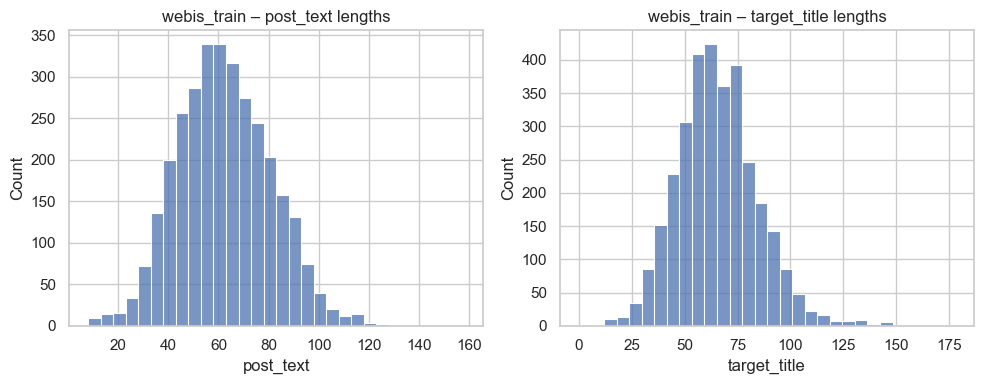

In [27]:
print("webis_train – post_text length stats:")
print(summarize_text_lengths(webis_train, "post_text"))

print("\nwebis_train – target_title length stats:")
print(summarize_text_lengths(webis_train, "target_title"))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(compute_text_lengths(webis_train, "post_text"), bins=30)
plt.title("webis_train – post_text lengths")

plt.subplot(1, 2, 2)
sns.histplot(compute_text_lengths(webis_train, "target_title"), bins=30)
plt.title("webis_train – target_title lengths")

plt.tight_layout()
plt.show()


## Summary and Next Steps

In this notebook we:

- Loaded all raw datasets via `src.eda.load_all_raw_datasets`.
- Built a global overview table of dataset sizes and key columns.
- Inspected the first rows of each dataset to understand schema and content:
  - Custom Greek news vs Greek LIFO clickbait.
  - Small GitHub snapshot.
  - Multiple Kaggle corpora (short headlines, longer titles, full articles).
  - Webis Clickbait 22 teaser/post vs target article metadata.
- Computed and visualized:
  - Label distributions where available.
  - Text length distributions for titles, headlines, and body text.

These insights will guide:

- How to harmonize labels across sources (binary clickbait vs news, vs topics).
- Which text fields to use for modeling (headline only vs headline + body).
- How to balance English and Greek data in the final training set.

Subsequent notebooks can build on this overview to perform deeper EDA
(e.g. n-gram analysis, language detection, overlap/deduplication) and model training.